# Tidy Tuesday: EuroLeague Basketball
**October 7, 2025**
* Which countries are most represented in the EuroLeague?
* How do arena capacities compare across teams and countries? In R, the readr::parse_number() function might be helpful here.
* Which clubs have been the most successful historically?

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

In [4]:
euro = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-10-07/euroleague_basketball.csv')

In [6]:
euro

,Team,Home city,Arena,Capacity,Last season,Country,FinalFour_Appearances,Titles_Won,Years_of_FinalFour_Appearances,Years_of_Titles_Won
0,Anadolu Efes,Istanbul,Basketball Development Center,"10,000",6th,Turkey,5,2,"2000, 2001, 2019, 2021, 2022","2021, 2022"
1,Barcelona,Barcelona,Palau Blaugrana,"7,585",5th,Spain,0,0,NaN,NaN
2,Baskonia,Vitoria-Gasteiz,Buesa Arena,"15,431",14th,Spain,0,0,NaN,NaN
3,Bayern Munich,Munich,SAP Garden,"11,500",9th,Germany,0,0,NaN,NaN
4,Crvena zvezda Meridianbet,Belgrade,Belgrade Arena,"18,386",10th,Serbia,0,0,NaN,NaN
5,Dubai Basketball,Dubai,Coca-Cola Arena,"17,000",NaN,United Arab Emirates,0,0,NaN,NaN
6,Fenerbahce,Istanbul,Ülker Sports and Event Hall,"13,000",1st,Turkey,7,2,"2015, 2016, 2017, 2018, 2019, 2024, 2025","2017, 2025"
7,Hapoel IBI Tel Aviv,Tel Aviv,Arena 8888 Sofia \ Arena Botevgrad \ Menora ...,"12,373",(EuroCup),Israel,0,0,NaN,NaN
8,LDLC ASVEL,Villeurbanne,"LDLC Arena, Astroballe","12,523, 5,556",15th,France,0,0,NaN,NaN
9,Maccabi Rapyd Tel Aviv,Tel Aviv,Menora Mivtachim Arena,"10,383",16th,Israel,0,0,NaN,NaN


### 1) Which countries are most represented in the EuroLeague?

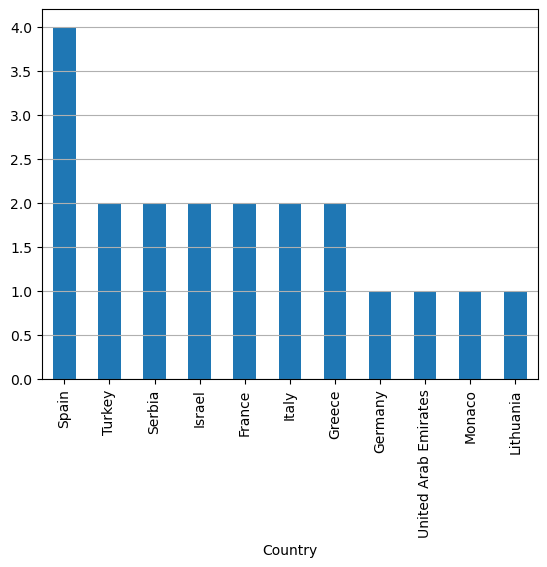

In [19]:
euro.Country.value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.grid(axis='y')

Spain is represented the most, with 4 teams.
 
###  2) How do arena capacities compare across teams and countries?
First, some data cleaning is needed.

In [102]:
arenas = euro[['Arena', 'Capacity']]
arenas.head()

,Arena,Capacity
0,Basketball Development Center,"10,000"
1,Palau Blaugrana,"7,585"
2,Buesa Arena,"15,431"
3,SAP Garden,"11,500"
4,Belgrade Arena,"18,386"


Some of the rows have the data of 2 arenas on the same row. I need to split the arens seperately.

In [103]:
names = arenas['Arena'].str.split(',').explode('Arena')
names.head()

0    Basketball Development Center
1                  Palau Blaugrana
2                      Buesa Arena
3                       SAP Garden
4                   Belgrade Arena
Name: Arena, dtype: object

In [104]:
caps = arenas['Capacity'].str.split(', ').explode('Capacity')
caps.head()

0    10,000
1     7,585
2    15,431
3    11,500
4    18,386
Name: Capacity, dtype: object

Now I need to format the arena capacities into numericals.

In [105]:
# Go down the string numbers to replace commas and convert to integers
for row in range(len(caps)):
    caps[row] = caps[row].replace(',', '')
    caps[row] = int(caps[row])

In [106]:
# Create new dataframe
arenas1 = pd.DataFrame(names)
arenas1['Capacity'] = caps
arenas1.head()

,Arena,Capacity
0,Basketball Development Center,10000
1,Palau Blaugrana,7585
2,Buesa Arena,15431
3,SAP Garden,11500
4,Belgrade Arena,18386


In [107]:
# Add team names and countries

full_teams = []
full_country = []

# Go down the data, and duplicate the correct team names and countries
for row in range(len(euro)):
    full_teams.append(euro['Team'][row])
    full_country.append(euro['Country'][row])
    if euro['Team'][row] in ['LDLC ASVEL', 'Paris Basketball', 'Virtus Olidata Bologna']:
        full_teams.append(euro['Team'][row])
        full_country.append(euro['Country'][row])

In [108]:
arenas1['Team'] = full_teams
arenas1['Country'] = full_country

In [109]:
arenas1

,Arena,Capacity,Team,Country
0,Basketball Development Center,10000,Anadolu Efes,Turkey
1,Palau Blaugrana,7585,Barcelona,Spain
2,Buesa Arena,15431,Baskonia,Spain
3,SAP Garden,11500,Bayern Munich,Germany
4,Belgrade Arena,18386,Crvena zvezda Meridianbet,Serbia
5,Coca-Cola Arena,17000,Dubai Basketball,United Arab Emirates
6,Ülker Sports and Event Hall,13000,Fenerbahce,Turkey
7,Arena 8888 Sofia \ Arena Botevgrad \ Menora ...,12373,Hapoel IBI Tel Aviv,Israel
8,LDLC Arena,12523,LDLC ASVEL,France
9,Astroballe,5556,LDLC ASVEL,France


#### Answering the question:

In [129]:
sqldf('''
SELECT SUM(Capacity), Team, Country FROM arenas1
GROUP BY Team
ORDER BY SUM(Capacity) DESC
LIMIT 5
''')

,SUM(Capacity),Team,Country
0,23705,Paris Basketball,France
1,18386,Partizan,Serbia
2,18386,Crvena zvezda Meridianbet,Serbia
3,18300,Panathinaikos,Greece
4,18079,LDLC ASVEL,France


The French team ***Paris Basketball*** has the largest sum capacity among its arenas. Serbia's ***Partizan*** and ***Crvena zvezda Meridianbet*** share second place, as both teams share the same *Belgrade Arena*.

In [127]:
sqldf('''
SELECT SUM(Capacity), Country FROM arenas1
GROUP BY Country
ORDER BY SUM(Capacity) DESC
LIMIT 5
''')

,SUM(Capacity),Country
0,53616,Spain
1,41784,France
2,36772,Serbia
3,30600,Greece
4,28250,Italy


Overall, regardless of team and arena, **Spain** has the largest arena capacity sum, followed by *France*.

### 3) Which clubs have been the most successful historically?
Historical success can be measured by the number of titles won. **Which clubs have won the most titles?**

In [145]:
sqldf('''
SELECT Team, Country, Titles_Won FROM euro
ORDER BY Titles_Won DESC
LIMIT 3
''')

,Team,Country,Titles_Won
0,Panathinaikos,Greece,7
1,Real Madrid,Spain,6
2,Olympiacos,Greece,3


Greece's **Panathinaikos** has won the most titles.

**Which clubs have made it into the final four the most?**

In [146]:
sqldf('''
SELECT Team, Country, FinalFour_Appearances FROM euro
ORDER BY FinalFour_Appearances DESC
LIMIT 5
''')

,Team,Country,FinalFour_Appearances
0,Olympiacos,Greece,14
1,Panathinaikos,Greece,13
2,Real Madrid,Spain,12
3,Fenerbahce,Turkey,7
4,Anadolu Efes,Turkey,5


Both of Greece's teams (**Olympiacos's 14** and **Panathinaikos's 13**) hold the lead on the most final four appearances. Spain's **Real Madrid** follows closely with 12 appearances.\
With the findings from above, note that while Olympiacos has made it into the final four the most, they have only won 3 titles. Compare this to their domestic rivals of Panathinaikos, who have 1 less final four appearance, but has more than double the title wins with 7 titles.